<a href="https://www.kaggle.com/code/mikedelong/iris-data-with-outlier-factors?scriptVersionId=244567647" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
from sklearn.datasets import load_iris

iris_df = load_iris(as_frame=True).frame

In [2]:
from sklearn.neighbors import LocalOutlierFactor

COLUMNS = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)', ]

clf = LocalOutlierFactor(n_neighbors=3)
iris_df['factor'] = clf.fit_predict(X=iris_df[COLUMNS])
iris_df['negative factor'] = clf.negative_outlier_factor_

In [3]:
from sklearn.manifold import TSNE

tsne = TSNE(perplexity=20.0)
iris_df[['x', 'y']] = tsne.fit_transform(X=iris_df[COLUMNS])

<Axes: xlabel='x', ylabel='y'>

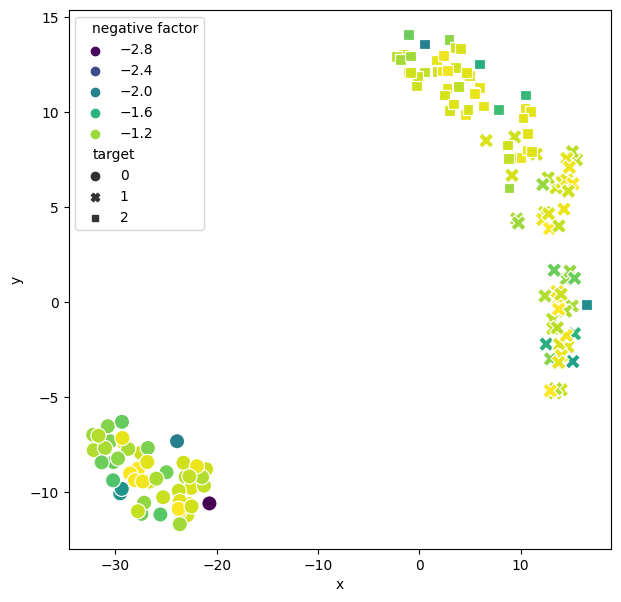

In [4]:
from seaborn import scatterplot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7, 7))
scatterplot(data=iris_df, x='x', y='y', hue='negative factor', palette='viridis', style='target', s=120)